In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pa
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

Import Sales Data

In [ ]:
df = pd.read_csv("/home/neosoft/Documents/csv_files/perrin_freres_monthly_champagne.csv")

In [3]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


Cleaning Data

Check for null values

In [4]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.columns = ["Month", "Sales"]

In [7]:
# Convert Month into Datetime
df["Month"] = pd.to_datetime(df["Month"])

In [8]:
df.set_index('Month', inplace=True)

In [9]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [10]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


Visualize the Data

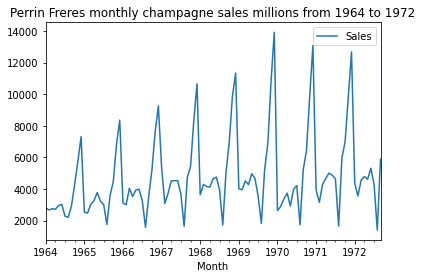

In [11]:
df.plot(title="Perrin Freres monthly champagne sales millions from 1964 to 1972")
plt.show()

Decomposing the Time Series

In [ ]:
# Additive Decomposition
decompose_data = seasonal_decompose(df['Sales'], model="additive")

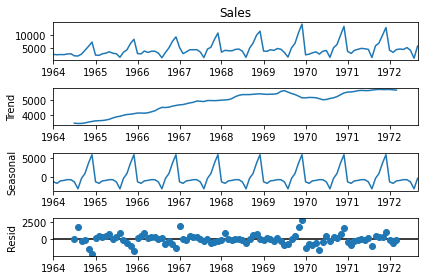

In [ ]:
decompose_data.plot()
plt.show()

The problem with ARIMA model is it does not support seasonality.

If the time series has seasonality, then, go for SARIMA which uses seasonal differencing.

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pa.auto_arima(df['Sales'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1501.191, Time=0.69 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1500.884, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1498.757, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1498.942, Time=0.97 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1511.271, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1499.959, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1499.625, Time=1.02 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1500.741, Time=0.64 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1499.028, Time=0.33 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1501.490, Time=1.56 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1500.866, Time=0.70 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1500.295, Time=1.09 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1500.747, Time=0.42 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1498.167, Time=0.73 sec
 ARIMA(0,0,1)(0,1,0

In [ ]:
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  105
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -745.083
Date:                             Mon, 20 Jun 2022   AIC                           1498.167
Time:                                     11:35:27   BIC                           1508.297
Sample:                                          0   HQIC                          1502.257
                                             - 105                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    362.8395    100.620      3.606      0.000     165.628     560.051
ma.L1          0.2191      0.074      2.970      0.003       0.075       0.364
ar.S.L12      -0.1784      0.082     -2.186      0.029      -0.338      -0.018
sigma2      5.135e+05   5.75e+04      8.924      0.000    4.01e+05    6.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 8.20
Prob(Q):                              0.55   Prob(JB):                         0.02
Heteroskedasticity (H):               1.27   Skew:                            -0.15
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
results = model.fit()

Testing the fitted model

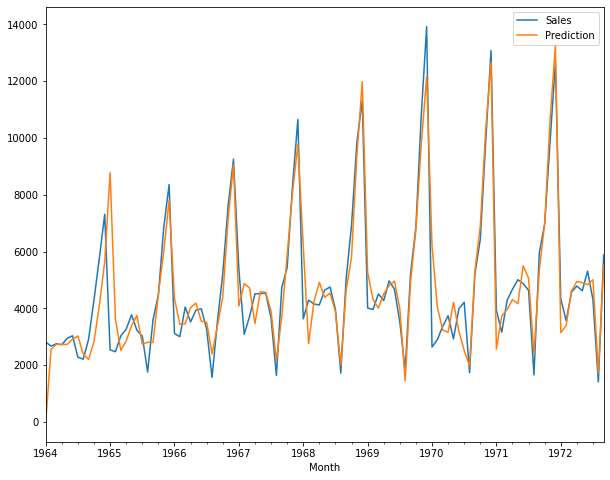

In [15]:
df['Prediction'] = results.predict()
df[['Sales','Prediction']].plot(figsize=(10, 8))
plt.show()

In [ ]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 24)]
future_dates_df = pd.DataFrame(index=future_dates[:], columns=df.columns)
final_df = pd.concat([df, future_dates_df])

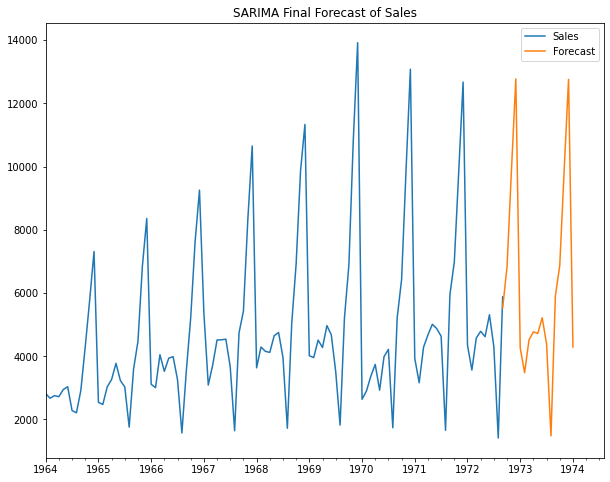

In [ ]:
final_df['Forecast'] = results.predict(start=104, end=120)
final_df[['Sales', 'Forecast']].plot(figsize=(10, 8))
plt.title("SARIMA Final Forecast of Sales")
plt.show()